In [218]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(city_data_df,ride_data_df, how="outer",on="city")

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

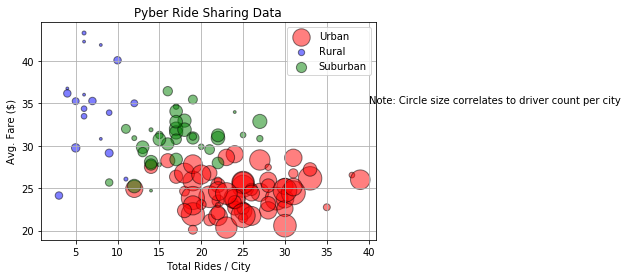

In [300]:
# Obtain the x and y coordinates for each of the three city types
urban_data = merged_df.loc[merged_df["type"] == "Urban",:].groupby(["city"])
urban_rides_per_city = urban_data["ride_id"].count()
urban_data_average_fare = urban_data["fare"].mean()
urban_data_driver_count = urban_data["driver_count"].mean()


rural_data = merged_df.loc[merged_df["type"] == "Rural",:].groupby(["city"])
rural_data_total_rides = rural_data["ride_id"].count()
rural_data_average_fare = rural_data["fare"].mean()
rural_data_driver_count = rural_data["driver_count"].mean()

suburan_data = merged_df.loc[merged_df["type"] == "Suburban",:].groupby(["city"])
suburban_data_total_rides = suburan_data["ride_id"].count()
suburban_data_average_fare = suburan_data["fare"].mean()
suburban_data_driver_count = suburan_data["driver_count"].mean()

# Build the scatter plots for each city types

urban = plt.scatter(urban_rides_per_city,urban_data_average_fare, urban_data_driver_count*8, marker="o", 
            facecolors="red", edgecolors="black", alpha=.5)

rural = plt.scatter(rural_data_total_rides, rural_data_average_fare, rural_data_driver_count*8, marker="o", 
            facecolors="blue", edgecolors="black", alpha=.5)

suburban = plt.scatter(suburban_data_total_rides, suburban_data_average_fare, suburban_data_driver_count*8, marker="o", 
            facecolors="green",edgecolors="black", alpha=.5)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Avg. Fare ($)")
plt.xlabel("Total Rides / City")
plt.grid(axis="both")

# Create a legend

plt.legend((urban, rural, suburban),("Urban","Rural","Suburban"))

# Incorporate a text label regarding circle size

plt.annotate("Note: Circle size correlates to driver count per city",xy=(40,35))

# Save Figure

plt.savefig("PyberRides.png")
plt.show()

In [301]:
# Show plot
plt.show()

## Total Fares by City Type

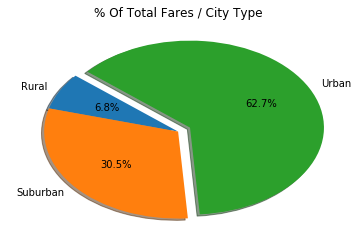

In [302]:
# Calculate Type Percents
fare_type = merged_df.groupby(["type"]).sum().drop(columns=["ride_id","driver_count"])
explode = [0,0,.1]
labels = ["Rural", "Suburban", "Urban"]

# Build Pie Chart
plt.pie(fare_type, explode=explode, startangle=140, shadow=True, autopct="%1.1f%%", labels=labels)
plt.title("% Of Total Fares / City Type")

# Save Figure
plt.savefig("FareTypes.png")

In [303]:
# Show Figure
plt.show()

## Total Rides by City Type

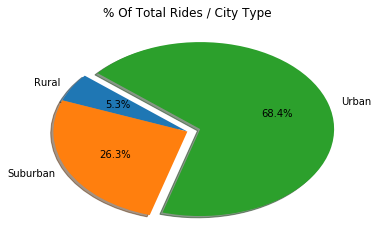

In [304]:
# Calculate Ride Percents
ride_type = merged_df.groupby(["type"]).count().drop(columns=["date","fare","ride_id","driver_count"])
explode = [0,0,.1]
labels = ["Rural", "Suburban", "Urban"]

# Build Pie Chart
plt.pie(ride_type, explode=explode, startangle=140, shadow=True, autopct="%1.1f%%", labels=labels)
plt.title("% Of Total Rides / City Type")

# Save Figure
plt.savefig("CityType.png")



In [305]:
# Show Figure
plt.show()

## Total Drivers by City Type

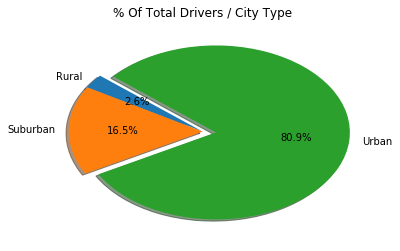

In [306]:
# Calculate Driver Percents
total_drivers = merged_df.groupby(["type","city"]).mean().drop(columns=["fare","ride_id"])
total_drivers_type = total_drivers.groupby(["type"]).sum()
explode = [0,0,.1]
labels = ["Rural", "Suburban", "Urban"]



# Build Pie Charts
plt.pie(total_drivers_type, explode=explode, startangle=140, shadow=True, autopct="%1.1f%%", labels=labels)
plt.title("% Of Total Drivers / City Type")

# Save Figure
plt.savefig("TotalDrivers.png")


In [307]:
# Show Figure
plt.show()